# KNN From Scratch
This notebook is one in a series where I attempt to build a few popular machine learning algorithms from scratch. It's a way for me to solidify my understanding of the algorithm and practice my coding as I apply for positions. I recently completed the Insight Data Science Fellowship, and am building out a portfolio while I apply for full-time positions.

**KNN** is a classification algorithm that takes labeled data and compares a given point with k points that are closest to it in multidimensional space. These neighbors get to "vote" on how to classify the given point, each voting for their own label. K should be an odd number if you're choosing between two classes, so that there are no ties. K must not be a multiple of the number of classes, also to avoid ties.


1. Get the distance between your point(s) and the data
2. Find the k closest points
3. Choose the highest voted class as a label
4. Return a vector of labels

In [1]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from random import uniform

In [2]:
# Let's initialize some data to play with
X, y = make_blobs(n_samples=100, centers=2, n_features=2,
                  random_state=0)

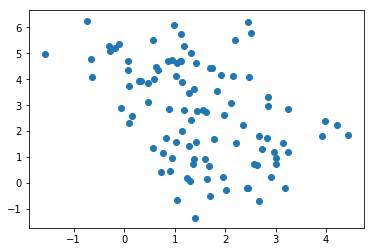

In [3]:
# Now we can take a look at the data we generated
plt.scatter(X[:,0], X[:,1])

In [4]:
#Great we have labeled data. How about we data about 1/3 of it and use that as our validation set
x_train = X[0:70]
y_train = y[0:70]

x_valid = X[70:]
y_valid = y[70:]

### Distance

Fortunately, I just wrote a k-Means algorithm from scratch and created a function to retrieve Euclidean distance. I'm going to modify this function again here to measure the distances.

In [5]:
def euclidean(X, C):
    """given an array of labeled data and an unlabeled data point, find the distance between
    any unlabeled point and the labeled points.
    """
    
    # get the differences for each feature between centroid location and data point location
    differences = X-C
    
    #calculate the distance
    #get the elementwise square of the differences
    diff2s = differences**2
    
    #add all of the squared differences
    a_b_sqrd = diff2s.sum(axis=1)
    
    #take the elementwise square root. Gives one distance for each feature
    c = a_b_sqrd**0.5
    
    return c

## Find K closest points (nearest neighbors)

Let's try to make sure we can properly call the function for just one value, and then we'll do it for all values.

In [6]:
distance = euclidean(x_valid[0], x_train)

We can use argsort to take the index of the sorted values. This is an easy way for us to get the k-nearest neighbors from our distance list

In [7]:
k_nn = np.argsort(distance)[:3]

In [8]:
k_nn

array([43, 69, 65])

If we look at the three nearest neighbors, they are the points at the above indices. Let's see what each of them voted manually.

In [27]:
print(y_train[43])
print(y_train[69])
print(y_train[65])

0
0
1


## Tally the votes

My first thought is that maybe I can give the indices that represent our k nearest neighbors to the array of our labels and have it return those labels as 'votes'.

In [10]:
# can I give a list of indices and return the values for those?
votes = y_train[k_nn]
votes
#yes

array([0, 0, 1])

Great! It seems to work. The next step is to take the value that occurs the most frequently, and choose that as the label.

## Return the labels

In [11]:
#now, can I take the most common value from that array?
label = np.bincount(votes).argmax()
#also yes.

Now that I've shown that we can get the distances for just one point, how about for a whole set of points?

In [12]:
k = 3
predictions = []

for x in x_valid:
    #calculate distance between point to be classified and the "training" data
    d = euclidean(x, x_train)
    
    #get the indices of the k nearest neighbors
    neighbors = np.argsort(d)[:k]
    
    #for the k nearest neighbors, find out what their votes were
    vote = y_train[neighbors]
    
    #count the votes for each class and return the highest vote
    label = np.bincount(vote).argmax()
    
    predictions.append(label)

In [13]:
y_valid

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1])

In [18]:
guesses = np.asarray(predictions)

## Metrics

Let's include a metric that let's us determine how well the algorithm is performing. Accuracy would be a good one to start with, given that we're interesting in knowing how many things are properly classified. A good follow-up would be to look at a confusion matrix.

In [25]:
def accuracy(preds, actuals):
    """take an np array of predicted values and an np array of actual values.
    Return the percentage that were correctly labeled"""
    correct = 0
    
    for pred, actual in zip(preds, actuals):
        if pred == actual:
            correct+=1
    
    accuracy = correct/len(preds)*100
    return accuracy

In [26]:
accuracy(guesses, y_valid)

100.0